# Extremal Reissner-Nordström spacetime

This SageMath notebook accompanies the article _Peeling at extreme black hole horizons_ by Jack Borthwick, Eric Gourgoulhon and Jean\-Philippe Nicolas,  [arXIv:2303.14574](https://arxiv.org/abs/2303.14574). It involves differential geometry tools implemented in [SageMath](https://www.sagemath.org/) through the 
[SageManifolds](https://sagemanifolds.obspm.fr/) project. 


In [1]:
version()

'SageMath version 9.8, Release Date: 2023-02-11'

In [2]:
%display latex

## Spacetime manifold

We declare the spacetime manifold $\mathscr{M}$ as a 4-dimensional Lorentzian manifold, with the keyword `signature='negative'`to indicate that the metric signature is chosen to be $(+,-,-,-)$:

In [3]:
M = Manifold(4, 'M', latex_name=r'\mathscr{M}', structure='Lorentzian', 
             signature='negative')
print(M)
M

4-dimensional Lorentzian manifold M


4-dimensional Lorentzian manifold M

We consider $\mathscr{M}$ to be a part of the maximally extended extreme Reissner-Nordström spacetime, namely 
$$\mathscr{M} = E_+ \cup E_-,$$
where $E_+$ and $E_-$ are the open subsets covered by the outgoing and ingoing Eddington-Finkelstein coordinates, respectively:

In [4]:
Ep = M.open_subset('Ep', latex_name='E_+')
Em = M.open_subset('Em', latex_name='E_-')
M.declare_union(Ep, Em)

In [5]:
list(M.open_covers())

[Set {M} of open subsets of the 4-dimensional Lorentzian manifold M,
 Set {Em, Ep} of open subsets of the 4-dimensional Lorentzian manifold M]

The Schwarzschild-Droste coordinates $(t,r,\theta,\varphi)$ on $E_+$:

In [6]:
XSp.<t,r,th,ph> = Ep.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\varphi")
XSp

Chart (Ep, (t, r, th, ph))

In [7]:
XSp.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

**Notation:**  in this notebook, all coordinate charts have a Python name starting with `X`,  like `XSp` above (`S` standing for Schwarzschild and `p` for $+$).

The Schwarzschild-Droste coordinates $(t,r,\theta,\varphi)$ on $E_-$:

In [8]:
XSm.<t,r,th,ph> = Em.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\varphi")
XSm

Chart (Em, (t, r, th, ph))

In [9]:
XSm.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

The black hole exterior is
$$ \mathrm{Ext} = E_+ \cap E_- $$
We therefore declare it as follows:

In [10]:
Ext = Ep.intersection(Em, name='Ext', latex_name=r'\mathrm{Ext}')
Ext

Open subset Ext of the 4-dimensional Lorentzian manifold M

The mass parameter of the extreme Reissner-Nordström spacetime:

In [11]:
m = var('m', domain='real')
assume(m>0)

The Schwarzschild-Droste coordinates $(t,r,\theta,\varphi)$ on $\mathrm{Ext}$ are defined from
the restriction of the chart `XSp` to $r>m$:

In [12]:
XSE = XSp.restrict(Ext, r>m)
XSE

Chart (Ext, (t, r, th, ph))

In [13]:
XSE.coord_range()

t: (-oo, +oo); r: (m, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

The chart `XSE` coincides with the restriction of the chart `XSm` to $r>m$:

In [14]:
XSE is XSm.restrict(Ext, r>m)

True

In [15]:
list(M.subsets())

[Open subset Ep of the 4-dimensional Lorentzian manifold M,
 4-dimensional Lorentzian manifold M,
 Open subset Ext of the 4-dimensional Lorentzian manifold M,
 Open subset Em of the 4-dimensional Lorentzian manifold M]

At this stage, 3 charts have been constructed on $\mathscr{M}$ and one of them is considered as the "default" chart (i.e. the chart that is used if omitted in the arguments of a function):

In [16]:
M.atlas()

[Chart (Ep, (t, r, th, ph)),
 Chart (Em, (t, r, th, ph)),
 Chart (Ext, (t, r, th, ph))]

In [17]:
M.default_chart()

Chart (Ep, (t, r, th, ph))

## Metric tensor

We define the metric tensor $g$ from its components in the charts $(E_+,(t,r,\theta,\varphi))$ and $(E_-,(t,r,\theta,\varphi))$:

In [18]:
g = M.metric()

F = (1 - m/r)^2

gp = g.restrict(Ep)
gp[0,0] = F
gp[1,1] = -1/F
gp[2,2] = -r^2
gp[3,3] = -r^2*sin(th)^2

gm = g.restrict(Em)
gm[0,0] = F
gm[1,1] = -1/F
gm[2,2] = -r^2
gm[3,3] = -r^2*sin(th)^2

In [19]:
g.display()  # display in the default chart, i.e. XSp

g = (m/r - 1)^2 dt⊗dt - 1/(m/r - 1)^2 dr⊗dr - r^2 dth⊗dth - r^2*sin(th)^2 dph⊗dph

In [20]:
g.display(XSp) # same as above

g = (m/r - 1)^2 dt⊗dt - 1/(m/r - 1)^2 dr⊗dr - r^2 dth⊗dth - r^2*sin(th)^2 dph⊗dph

In [21]:
g.display(XSm)

g = (m/r - 1)^2 dt⊗dt - 1/(m/r - 1)^2 dr⊗dr - r^2 dth⊗dth - r^2*sin(th)^2 dph⊗dph

## Eddington-Finkelstein coordinates

Tortoise coordinate \[Eq. (2.4)\]

In [22]:
rstar(r) = r - m + 2*m*ln(abs(r - m)/m) - m^2/(r - m)
rstar(r)

2*m*log(abs(-m + r)/m) - m + m^2/(m - r) + r

Note that the additive constant is chosen so that $r_* = 0$ for $r=2m$:

In [23]:
rstar(2*m)

0

The chart of the **outgoing Eddington-Finkelstein coordinates** $(u,r,\theta,\varphi)$ on $E_+$:

In [24]:
XOEF.<u,r,th,ph> = Ep.chart(r"u r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\varphi")
XOEF

Chart (Ep, (u, r, th, ph))

In [25]:
Sp_to_OEF = XSp.transition_map(XOEF, [t - rstar(r), r, th, ph])  # Eq. (2.5)
Sp_to_OEF.display()

u = -2*m*log(abs(-m + r)/m) + m - m^2/(m - r) - r + t
r = r
th = th
ph = ph

In [26]:
Sp_to_OEF.inverse().display()

t = -(2*m^2*log(m) - 2*(m*log(m) + m)*r + r^2 - (m - r)*u - 2*(m^2 - m*r)*log(abs(-m + r)))/(m - r)
r = r
th = th
ph = ph

In [27]:
gp.display(XOEF)

g = (m^2 - 2*m*r + r^2)/r^2 du⊗du + du⊗dr + dr⊗du - r^2 dth⊗dth - r^2*sin(th)^2 dph⊗dph

The transition maps are propagated from $E_+$ to the subset $\mathrm{Ext}$:

In [28]:
Ep.coord_change(XSp, XOEF).restrict(Ext)
Ep.coord_change(XOEF, XSp).restrict(Ext)

Change of coordinates from Chart (Ext, (u, r, th, ph)) to Chart (Ext, (t, r, th, ph))

The chart of the **ingoing Eddington-Finkelstein coordinates** $(v,r,\theta,\varphi)$ on $E_-$:

In [29]:
XIEF.<v,r,th,ph> = Em.chart(r"v r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\varphi")
XIEF

Chart (Em, (v, r, th, ph))

In [30]:
Sm_to_IEF = XSm.transition_map(XIEF, [t + rstar(r), r, th, ph])
Sm_to_IEF.display()

v = 2*m*log(abs(-m + r)/m) - m + m^2/(m - r) + r + t
r = r
th = th
ph = ph

In [31]:
Sm_to_IEF.inverse().display()

t = (2*m^2*log(m) - 2*(m*log(m) + m)*r + r^2 + (m - r)*v - 2*(m^2 - m*r)*log(abs(-m + r)))/(m - r)
r = r
th = th
ph = ph

In [32]:
gm.display(XIEF)

g = (m^2 - 2*m*r + r^2)/r^2 dv⊗dv - dv⊗dr - dr⊗dv - r^2 dth⊗dth - r^2*sin(th)^2 dph⊗dph

The transition maps are propagated from $E_-$ to the subset $\mathrm{Ext}$:

In [33]:
Em.coord_change(XSm, XIEF).restrict(Ext)
Em.coord_change(XIEF, XSm).restrict(Ext)

Change of coordinates from Chart (Ext, (v, r, th, ph)) to Chart (Ext, (t, r, th, ph))

### Principal null directions

The tangent vector $n_+$ to the outgoing principal null geodesics is defined according to Eq. (2.7):

In [34]:
np = Ep.vector_field(1/F, 1, 0, 0, 
                     name='np', latex_name=r'n_+')
np.display()

np = (m/r - 1)^(-2) ∂/∂t + ∂/∂r

$n_+$ is a null vector:

In [35]:
g(np, np).expr()

0

and is a geodesic vector, i.e. it obeys $\nabla_{n_+} n_+ = 0$:

In [36]:
nabla = g.connection()

In [37]:
nabla(np).contract(np).display()

0

Similarly, the tangent vector $n_-$ to the ingoing principal null geodesics is \[cf. Eq. (2.7)\]:

In [38]:
nm = Em.vector_field(1/F, -1, 0, 0, 
                     name='nm', latex_name=r'n_-')
nm.display()

nm = (m/r - 1)^(-2) ∂/∂t - ∂/∂r

$n_-$ is a null geodesic vector:

In [39]:
g(nm, nm).expr()

0

In [40]:
nabla(nm).contract(nm).display()

0

## Compactified pictures of $E_+$, $E_-$ and $\mathscr{M} = E_+ \cup E_-$

We introduce the Euclidean plane $\mathbb{R}^2$ to draw some pictures:

In [41]:
R2.<T,X> = EuclideanSpace()
X2 = R2.cartesian_coordinates()

and we define a map from $\mathscr{M}$ to a compact region of $\mathbb{R}^2$ by means of the arctangent function:


In [42]:
Psi = M.diff_map(R2, {(XOEF, X2): (atan(u/(2*m)) + atan((u+2*rstar(r))/(2*m)) - pi*unit_step(m - r),
                                   atan((u+2*rstar(r))/(2*m)) - atan(u/(2*m)) - pi*unit_step(m - r)),
                      (XIEF, X2): (atan((v-2*rstar(r))/(2*m)) + atan(v/(2*m)) + pi*unit_step(m - r),
                                   atan(v/(2*m)) - atan((v-2*rstar(r))/(2*m)) - pi*unit_step(m - r))},
                 name='Psi', latex_name=r'\Psi')
Psi.display(XOEF, X2)

Psi: M → E^2
on Ep: (u, r, th, ph) ↦ (T, X) = (-pi*unit_step(m - r) + arctan(1/2*(4*m*log(abs(-m + r)/m) - 2*m + 2*m^2/(m - r) + 2*r + u)/m) + arctan(1/2*u/m), -pi*unit_step(m - r) + arctan(1/2*(4*m*log(abs(-m + r)/m) - 2*m + 2*m^2/(m - r) + 2*r + u)/m) - arctan(1/2*u/m))

In [43]:
Psi.display(XIEF, X2)

Psi: M → E^2
on Em: (v, r, th, ph) ↦ (T, X) = (pi*unit_step(m - r) + arctan(-1/2*(4*m*log(abs(-m + r)/m) - 2*m + 2*m^2/(m - r) + 2*r - v)/m) + arctan(1/2*v/m), -pi*unit_step(m - r) - arctan(-1/2*(4*m*log(abs(-m + r)/m) - 2*m + 2*m^2/(m - r) + 2*r - v)/m) + arctan(1/2*v/m))

We use this map to get a compactified view of $E_+$, with the outgoing null geodesics as solid green lines
and the curves $r=\mathrm{const}$ depicted in red, via the method `plot` of the chart `XOEF` = $(E_+, (u,r,\theta,\varphi))$:

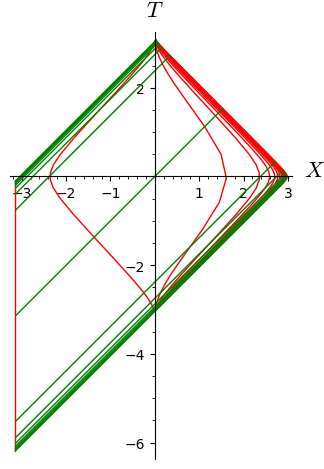

In [44]:
graphEp = XOEF.plot(X2, mapping=Psi, ambient_coords=(X,T), 
                    fixed_coords={th: pi/2,  ph: pi}, color={u: 'red', r: 'green'}, 
                    ranges={u: (-40, 40), r: (0, 20)}, number_values={u: 17, r: 16},
                    parameters={m: 1})
graphEp

Let us superpose the hypersurfaces 

- $r=0$ (the curvature singularity): orange dotted line
- $r=m$ (the past event horizon $\mathscr{H}^-$):  solid black line 
- $r=2m$ (the photon sphere): red dashed line


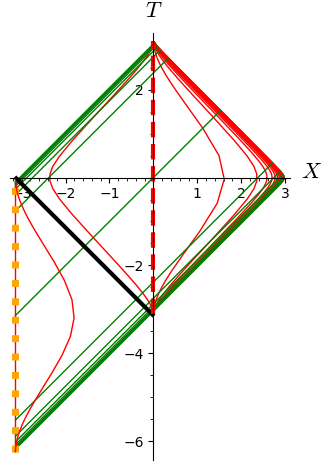

In [45]:
def plot_const_r_Ep(r0, color='red', linestyle='-', thickness=1, plot_points=300):
    return XOEF.plot(X2, mapping=Psi, ambient_coords=(X,T), 
                     fixed_coords={r: r0, th: pi/2, ph: pi},
                     ranges={u: (-100, 100)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1})

graphEp += plot_const_r_Ep(0, color='orange', linestyle=':', thickness=5)
graphEp += plot_const_r_Ep(1.001*m, color='black', thickness=3)
graphEp += plot_const_r_Ep(2*m, color='red', linestyle='--', thickness=3)
graphEp += plot_const_r_Ep(0.8*m)
graphEp

The above figure is similar to Fig. 1a of the article tilted by $45^\circ$.

Similarly, we get a compactified view of $E_-$ via the method `plot` of the chart `XIEF`=$(E_-, (v,r,\theta,\varphi))$, with the ingoing null geodesics as dashed green lines,
the curves $r=\mathrm{const}$ depicted in red and the following hypersurfaces:

- $r=0$ (the curvature singularity): orange dotted line
- $r=m$ (the future event horizon $\mathscr{H}^+$):  solid black line 
- $r=2m$ (the photon sphere): red dashed line


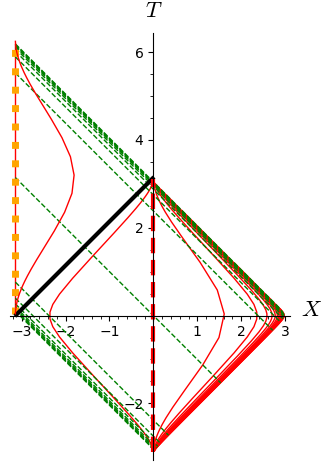

In [46]:
graphEn = XIEF.plot(X2, mapping=Psi, ambient_coords=(X,T), fixed_coords={th: pi/2,  ph: pi}, 
                  color={v: 'red', r: 'green'}, ranges={v: (-40, 40), r: (0, 20)},
                  number_values={v: 17, r: 16}, style={v: 'solid', r: 'dashed'},
                  parameters={m: 1})

def plot_const_r_En(r0, color='red', linestyle='-', thickness=1, plot_points=300):
    return XIEF.plot(X2, mapping=Psi, ambient_coords=(X,T), 
                     fixed_coords={r: r0, th: pi/2, ph: pi},
                     ranges={v: (-100, 100)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1})

graphEn += plot_const_r_En(0, color='orange', linestyle=':', thickness=5)
graphEn += plot_const_r_En(1.001*m, color='black', thickness=3)
graphEn += plot_const_r_En(2*m, color='red', linestyle='--', thickness=3)
graphEn += plot_const_r_En(0.8*m)
graphEn

The above figure is similar to Fig. 1b of the article tilted by $-45^\circ$.

A compactified view of $\mathscr{M}$, with the outgoing (resp. ingoing) null geodesics as solid (resp. dashed) green lines
and the curves $r=\mathrm{const}$ depicted in red:

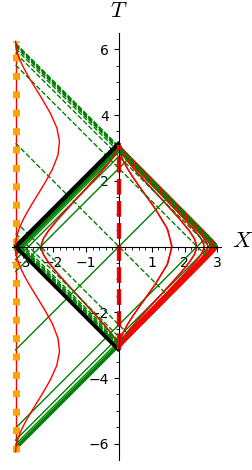

In [47]:
graphM = graphEp + graphEn
graphM

The above figure is similar to Fig. 2 of the article. 

At this stage, 7 charts have been constructed on $\mathscr{M}$:

In [48]:
M.atlas()

[Chart (Ep, (t, r, th, ph)),
 Chart (Em, (t, r, th, ph)),
 Chart (Ext, (t, r, th, ph)),
 Chart (Ep, (u, r, th, ph)),
 Chart (Ext, (u, r, th, ph)),
 Chart (Em, (v, r, th, ph)),
 Chart (Ext, (v, r, th, ph))]

## The conformally compactified exterior

Let us introduce the coordinate $R = 1/r$ on $\mathrm{Ext}$ via a new chart:

In [49]:
XR.<u, R, th, ph> = Ext.chart(r"u R:(0,1/m) th:(0,pi):\theta ph:(0,2*pi):periodic:\varphi")
XR

Chart (Ext, (u, R, th, ph))

In [50]:
XR.coord_range()

u: (-oo, +oo); R: (0, 1/m); th: (0, pi); ph: [0, 2*pi] (periodic)

In [51]:
XOEF_to_XR = XOEF.restrict(Ext).transition_map(XR, (u, 1/r, th, ph))
XOEF_to_XR.display()

u = u
R = 1/r
th = th
ph = ph

In [52]:
XOEF_to_XR.inverse().display()

u = u
r = 1/R
th = th
ph = ph

We get the change of coordinates $(t,r,\theta,\varphi) \to (u,R,\theta,\varphi)$ by combining previously defined changes of coordinates via the operator `*`:

In [53]:
XSE_to_XR = XOEF_to_XR * Ext.coord_change(XSE, XOEF.restrict(Ext))
XSE_to_XR.display()

u = (2*m^2*log(m) - 2*(m*log(m) + m)*r + r^2 + (m - r)*t - 2*(m^2 - m*r)*log(abs(-m + r)))/(m - r)
R = 1/r
th = th
ph = ph

In [54]:
XSE_to_XR.inverse().display()

t = -(2*R^2*m^2*log(R) - 2*(R*log(R) + R)*m - (R^2*m - R)*u + 2*(R^2*m^2 - R*m)*log(m) - 2*(R^2*m^2 - R*m)*log(abs(R*m - 1)) + 1)/(R^2*m - R)
r = 1/R
th = th
ph = ph

From now on, we use $(u,R,\theta,\varphi)$ as the default coordinates on $\mathrm{Ext}$:

In [55]:
Ext.set_default_chart(XR)
Ext.set_default_frame(XR.frame())

The metric $g$ in terms of the "compactified" coordinates $(u,R,\theta,\varphi)$:

In [56]:
gE = g.restrict(Ext)
gE.display()

g = (R^2*m^2 - 2*R*m + 1) du⊗du - 1/R^2 du⊗dR - 1/R^2 dR⊗du - 1/R^2 dth⊗dth - sin(th)^2/R^2 dph⊗dph

### Conformal metric $\hat{g}$

We use $R^2$ as the conformal factor, defining $\hat{g}$ by

In [57]:
gh = Ext.lorentzian_metric('gh', latex_name=r'\hat{g}', signature='negative')
gh.set(R^2 * gE)
gh.display()

gh = (R^4*m^2 - 2*R^3*m + R^2) du⊗du - du⊗dR - dR⊗du - dth⊗dth - sin(th)^2 dph⊗dph

In [58]:
gh.apply_map(factor, keep_other_components=True)
gh.display()

gh = (R*m - 1)^2*R^2 du⊗du - du⊗dR - dR⊗du - dth⊗dth - sin(th)^2 dph⊗dph

This expression agrees with Eq. (2.9).

## Couch-Torrence inversion

We define the Couch-Torrence inversion $\Phi$ according to Eq. (3.1):

In [59]:
Phi = Ext.diffeomorphism(Ext, {(XSE, XSE): (t, m*r/(r - m), th, ph)}, 
                         name='Phi', latex_name=r'\Phi')
Phi.display(XSE, XSE)

Phi: Ext → Ext
   (t, r, th, ph) ↦ (t, -m*r/(m - r), th, ph)

The Couch-Torrence inversion takes a simple form in terms of the tortoise coordinate $r_*$:

In [60]:
Phi_r(r) = Phi.expr(XSE, XSE)[1]
Phi_r

r |--> -m*r/(m - r)

In [61]:
(rstar(Phi_r(r)) + rstar(r)).simplify_log()

0

The inverse of $\Phi$ is 

In [62]:
Phi.inverse().display(XSE, XSE)

Phi^(-1): Ext → Ext
   (t, r, th, ph) ↦ (t, -m*r/(m - r), th, ph)

$\Phi$ is an involution:

In [63]:
Phi.inverse() == Phi

True

In [64]:
Phi.display(XR, XR)

Phi: Ext → Ext
   (u, R, th, ph) ↦ (-(4*R^2*m^2*log(R) - 4*(R*log(R) + R)*m - (R^2*m - R)*u + 4*(R^2*m^2 - R*m)*log(m) - 4*(R^2*m^2 - R*m)*log(abs(R*m - 1)) + 2)/(R^2*m - R), -(R*m - 1)/m, th, ph)

### The Couch-Torrence inversion as a conformal isometry of $g$

The pullback of $g$ by $\Phi$ is

In [65]:
Pg = Phi.pullback(gE)
Pg.display(XSE)

Phi^*(g) = m^2/r^2 dt⊗dt - m^2*r^2/(m^4 - 4*m^3*r + 6*m^2*r^2 - 4*m*r^3 + r^4) dr⊗dr - m^2*r^2/(m^2 - 2*m*r + r^2) dth⊗dth - m^2*r^2*sin(th)^2/(m^2 - 2*m*r + r^2) dph⊗dph

In [66]:
Pg.apply_map(factor, frame=XSE.frame(), chart=XSE, keep_other_components=True)
Pg.display(XSE)

Phi^*(g) = m^2/r^2 dt⊗dt - m^2*r^2/(m - r)^4 dr⊗dr - m^2*r^2/(m - r)^2 dth⊗dth - m^2*r^2*sin(th)^2/(m - r)^2 dph⊗dph

We notice that
$$\Phi^* g = \frac{m^2}{(r - m)^2} g$$
Indeed:

In [67]:
Pg == m^2/(r - m)^2 * gE

True

Hence, $\Phi$ is a conformal isometry of $\left. g \right| _{\rm Ext}$, with conformal factor $\Omega = \frac{m}{r - m}$.

### The Couch-Torrence inversion as an isometry of $\hat{g}$

Let us check that $\Phi^*\hat{g} = \hat{g}$ \[Eq. (3.3)\]:

In [68]:
Phi.pullback(gh) == gh

True

## Computations for the peeling at infinity

The conformal metric on ${\rm Ext}$ is

In [69]:
gh.display()

gh = (R*m - 1)^2*R^2 du⊗du - du⊗dR - dR⊗du - dth⊗dth - sin(th)^2 dph⊗dph

Its inverse is \[unumbered equation above Eq. (4.1)\]

In [70]:
gh.inverse().display()

inv_gh = -∂/∂u⊗∂/∂R - ∂/∂R⊗∂/∂u + (-R^4*m^2 + 2*R^3*m - R^2) ∂/∂R⊗∂/∂R - ∂/∂th⊗∂/∂th - 1/sin(th)^2 ∂/∂ph⊗∂/∂ph

Its scalar curvature is \[Eq. (4.1)\]

In [71]:
gh.ricci_scalar().expr()

12*R^2*m^2 - 12*R*m

The volume 4-form of $\hat{g}$ is \[Eq. (4.2)\]

In [72]:
gh.volume_form().display()

eps_gh = sin(th) du∧dR∧dth∧dph

The d'Alembertian w.r.t. $\hat{g}$ of a generic function $f$ is 

In [73]:
fs = Ext.scalar_field(function('f')(u,R,th,ph))
Df = fs.dalembertian(gh).coord_function()
Df

-(2*(2*R^3*m^2 - 3*R^2*m + R)*sin(th)^2*d(f)/dR + (R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2*d^2(f)/dR^2 + 2*sin(th)^2*d^2(f)/dudR + cos(th)*sin(th)*d(f)/dth + sin(th)^2*d^2(f)/dth^2 + d^2(f)/dph^2)/sin(th)^2

In [74]:
Df.expand()

-R^4*m^2*d^2(f)/dR^2 - 4*R^3*m^2*d(f)/dR + 2*R^3*m*d^2(f)/dR^2 + 6*R^2*m*d(f)/dR - R^2*d^2(f)/dR^2 - 2*R*d(f)/dR - cos(th)*d(f)/dth/sin(th) - d^2(f)/dph^2/sin(th)^2 - 2*d^2(f)/dudR - d^2(f)/dth^2

Check of Eq. (4.5):

In [75]:
Df + 2*diff(f(u,R,th,ph), u, R) + diff(R^2*(1 - m*R)^2*diff(f(u,R,th,ph), R), R)

-(cos(th)*sin(th)*d(f)/dth + sin(th)^2*d^2(f)/dth^2 + d^2(f)/dph^2)/sin(th)^2

The Levi-Civita connection of $\hat{g}$:

In [76]:
nablah = gh.connection()

### Morawetz vector field

The Morawetz vector field is defined according to Eq. (4.6):

In [77]:
K = Ext.vector_field(u^2, -2*(1 + u*R), 0, 0, name='K')
K.display()

K = u^2 ∂/∂u + (-2*R*u - 2) ∂/∂R

Its Killing form is \[Eq. (4.7)\]:

In [78]:
KilK = nablah(K.down(gh)).symmetrize()
KilK.display()

(-4*R^3*m^2 + 6*R^2*m - 2*(R^4*m^2 - R^3*m)*u) du⊗du

In [79]:
KilK.apply_map(factor)
KilK.display()

-2*(R^2*m*u + 2*R*m - R*u - 3)*R^2*m du⊗du

### Energy-momentum tensor of a generic scalar field $\phi$

In [80]:
phis = Ext.scalar_field(function('phi')(u,R,th,ph),
                        name='phi', latex_name=r'\phi')
phis.display(XR)

phi: Ext → ℝ
   (u, R, th, ph) ↦ phi(u, R, th, ph)

The covariant derivative of $\hat{\nabla}\phi$:

In [81]:
nab_phi = nablah(phis)

Since $\phi$ is a scalar field, we have of course $\hat{\nabla}\phi = \mathrm{d}\phi$:

In [82]:
nab_phi.display()

dphi = d(phi)/du du + d(phi)/dR dR + d(phi)/dth dth + d(phi)/dph dph

In [83]:
nab_phi == diff(phis)

True

In [84]:
T = nab_phi * nab_phi - 1/2*gh.inverse()(nab_phi, nab_phi) * gh
T.set_name('T')
T.display()

T = 1/2*(2*(R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2*d(phi)/du*d(phi)/dR + (R^8*m^4 - 4*R^7*m^3 + 6*R^6*m^2 - 4*R^5*m + R^4)*sin(th)^2*d(phi)/dR^2 + (R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2*(d(phi)/dth)^2 + 2*sin(th)^2*d(phi)/du^2 + (R^4*m^2 - 2*R^3*m + R^2)*(d(phi)/dph)^2)/sin(th)^2 du⊗du - 1/2*((R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2*(d(phi)/dR)^2 + sin(th)^2*(d(phi)/dth)^2 + (d(phi)/dph)^2)/sin(th)^2 du⊗dR + d(phi)/du*d(phi)/dth du⊗dth + d(phi)/du*d(phi)/dph du⊗dph - 1/2*((R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2*(d(phi)/dR)^2 + sin(th)^2*(d(phi)/dth)^2 + (d(phi)/dph)^2)/sin(th)^2 dR⊗du + (d(phi)/dR)^2 dR⊗dR + d(phi)/dR*d(phi)/dth dR⊗dth + d(phi)/dR*d(phi)/dph dR⊗dph + d(phi)/du*d(phi)/dth dth⊗du + d(phi)/dR*d(phi)/dth dth⊗dR - 1/2*((R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2*(d(phi)/dR)^2 + 2*sin(th)^2*d(phi)/du*d(phi)/dR - sin(th)^2*(d(phi)/dth)^2 + (d(phi)/dph)^2)/sin(th)^2 dth⊗dth + d(phi)/dth*d(phi)/dph dth⊗dph + d(phi)/du*d(phi)/dph dph⊗du + d(phi)/dR*d(phi)/dph dph⊗dR + d(phi)/dth*d(phi)/dph dph⊗dth + (-1/2*(R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2*(d(phi)/dR)^2 - sin(th)^2*d(phi)/du*d(phi)/dR - 1/2*sin(th)^2*(d(phi)/dth)^2 + 1/2*(d(phi)/dph)^2) dph⊗dph

### Energy current

The energy current associated to the Morawez vector field is defined according to Eq. (4.8):

In [85]:
J = T.contract(K)
J.set_name('J')
J.display()

J = 1/2*(2*(R^4*m^2 - 2*R^3*m + R^2)*u^2*sin(th)^2*d(phi)/du*d(phi)/dR + 2*u^2*sin(th)^2*d(phi)/du^2 + ((R^8*m^4 - 4*R^7*m^3 + 6*R^6*m^2 - 4*R^5*m + R^4)*u^2*sin(th)^2 + 2*(R^5*m^2 - 2*R^4*m + R^3)*u*sin(th)^2 + 2*(R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2)*d(phi)/dR^2 + ((R^4*m^2 - 2*R^3*m + R^2)*u^2*sin(th)^2 + 2*R*u*sin(th)^2 + 2*sin(th)^2)*(d(phi)/dth)^2 + ((R^4*m^2 - 2*R^3*m + R^2)*u^2 + 2*R*u + 2)*(d(phi)/dph)^2)/sin(th)^2 du - 1/2*(u^2*sin(th)^2*(d(phi)/dth)^2 + u^2*(d(phi)/dph)^2 + ((R^4*m^2 - 2*R^3*m + R^2)*u^2*sin(th)^2 + 4*R*u*sin(th)^2 + 4*sin(th)^2)*(d(phi)/dR)^2)/sin(th)^2 dR + (u^2*d(phi)/du*d(phi)/dth - 2*(R*u + 1)*d(phi)/dR*d(phi)/dth) dth + (u^2*d(phi)/du*d(phi)/dph - 2*(R*u + 1)*d(phi)/dR*d(phi)/dph) dph

The Hodge dual of $J$:

In [86]:
star_J = J.hodge_dual(gh)
star_J.display()

*J = (u^2*d(phi)/du*d(phi)/dph - 2*(R*u + 1)*d(phi)/dR*d(phi)/dph)/sin(th) du∧dR∧dth + (-u^2*sin(th)*d(phi)/du*d(phi)/dth + 2*(R*u*sin(th) + sin(th))*d(phi)/dR*d(phi)/dth) du∧dR∧dph + ((R^4*m^2 - 2*R^3*m + R^2)*u^2*sin(th)^2*d(phi)/du*d(phi)/dR + u^2*sin(th)^2*d(phi)/du^2 - ((R^5*m^2 - 2*R^4*m + R^3)*u*sin(th)^2 + (R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2)*d(phi)/dR^2 + (R*u*sin(th)^2 + sin(th)^2)*(d(phi)/dth)^2 + (R*u + 1)*(d(phi)/dph)^2)/sin(th) du∧dth∧dph + 1/2*(u^2*sin(th)^2*(d(phi)/dth)^2 + u^2*(d(phi)/dph)^2 + ((R^4*m^2 - 2*R^3*m + R^2)*u^2*sin(th)^2 + 4*R*u*sin(th)^2 + 4*sin(th)^2)*(d(phi)/dR)^2)/sin(th) dR∧dth∧dph

The divergence $\hat{\nabla}^a J_a$: 

In [87]:
divJ = nablah(J).up(gh, 1).trace()
divJ.coord_function()

(4*(R*u*sin(th)^2 + sin(th)^2)*d^2(phi)/dudR*d(phi)/dR + 2*((3*R^4*m^2 - 5*R^3*m + 2*R^2)*u*sin(th)^2 + (2*R^3*m^2 - 3*R^2*m + 2*R)*sin(th)^2)*d(phi)/dR^2 + 2*((R^5*m^2 - 2*R^4*m + R^3)*u*sin(th)^2 + (R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2)*d(phi)/dR*d^2(phi)/dR^2 + 2*(R*u*cos(th)*sin(th) + cos(th)*sin(th))*d(phi)/dR*d(phi)/dth + 2*(R*u*sin(th)^2 + sin(th)^2)*d(phi)/dR*d^2(phi)/dth^2 + 2*(R*u + 1)*d(phi)/dR*d^2(phi)/dph^2 - (2*(2*R^3*m^2 - 3*R^2*m + R)*u^2*sin(th)^2*d(phi)/dR + (R^4*m^2 - 2*R^3*m + R^2)*u^2*sin(th)^2*d^2(phi)/dR^2 + 2*u^2*sin(th)^2*d^2(phi)/dudR + u^2*cos(th)*sin(th)*d(phi)/dth + u^2*sin(th)^2*d^2(phi)/dth^2 + u^2*d^2(phi)/dph^2)*d(phi)/du)/sin(th)^2

This expression can be simplified by taking into account the wave equation (4.4) satisfied by 
$\phi$: 
$$\Box_{\hat{g}} \phi + 2 m R (m R - 1) \phi = 0$$
To enforce the simplification, we extract $\frac{\partial^2\phi}{\partial\theta^2}$ from this equation and 
substitute it in $\hat{\nabla}^a J_a$:

In [88]:
wave_eq = phis.dalembertian(gh) + 2*m*R*(m*R - 1)*phis
d2phidth2 = (wave_eq.expr() + diff(function('phi')(u,R,th,ph), th, th)).simplify_full()
d2phidth2

(2*(R^2*m^2 - R*m)*phi(u, R, th, ph)*sin(th)^2 - 2*(2*R^3*m^2 - 3*R^2*m + R)*sin(th)^2*diff(phi(u, R, th, ph), R) - (R^4*m^2 - 2*R^3*m + R^2)*sin(th)^2*diff(phi(u, R, th, ph), R, R) - 2*sin(th)^2*diff(phi(u, R, th, ph), u, R) - cos(th)*sin(th)*diff(phi(u, R, th, ph), th) - diff(phi(u, R, th, ph), ph, ph))/sin(th)^2

In [89]:
divJ.set_expr(divJ.expr().subs({diff(function('phi')(u,R,th,ph), th, th): d2phidth2}).simplify_full())
divJ.coord_function()

-2*(R^2*m^2 - R*m)*u^2*phi(u, R, th, ph)*d(phi)/du + 4*(R^2*m^2 - R*m + (R^3*m^2 - R^2*m)*u)*phi(u, R, th, ph)*d(phi)/dR - 2*(2*R^3*m^2 - 3*R^2*m + (R^4*m^2 - R^3*m)*u)*d(phi)/dR^2

This agrees with Eq. (4.16). 

### Vector field normal to $\mathcal{H}_{s, u_0}$

In [90]:
assume(R*m - 1 < 0)

Expression of $r_*$ in terms of $R$:

In [91]:
rstar_R = rstar(1/R).simplify_full()
rstar_R

(2*R*m + 2*(R^2*m^2 - R*m)*log(-(R*m - 1)/(R*m)) - 1)/(R^2*m - R)

Let us introduce the scalar field $s=-u/r_*$:

In [92]:
s = Ext.scalar_field(-u/rstar_R, name='s')
s.display(XR)

s: Ext → ℝ
   (u, R, th, ph) ↦ -(R^2*m - R)*u/(2*R*m + 2*(R^2*m^2 - R*m)*log(-(R*m - 1)/(R*m)) - 1)

In [93]:
ds = diff(s)
ds.display()

ds = (R^2*m - R)/(2*R^2*m^2*log(R) - 2*(R*log(R) + R)*m - 2*(R^2*m^2 - R*m)*log(-R*m + 1) + 2*(R^2*m^2 - R*m)*log(m) + 1) du - u/(4*R^4*m^4*log(R)^2 - 8*(R^3*log(R)^2 + R^3*log(R))*m^3 + 4*(R^2*log(R)^2 + 3*R^2*log(R) + R^2)*m^2 + 4*(R^4*m^4 - 2*R^3*m^3 + R^2*m^2)*log(-R*m + 1)^2 + 4*(R^4*m^4 - 2*R^3*m^3 + R^2*m^2)*log(m)^2 - 4*(R*log(R) + R)*m - 4*(2*R^4*m^4*log(R) - 2*(2*R^3*log(R) + R^3)*m^3 + (2*R^2*log(R) + 3*R^2)*m^2 - R*m + 2*(R^4*m^4 - 2*R^3*m^3 + R^2*m^2)*log(m))*log(-R*m + 1) + 4*(2*R^4*m^4*log(R) - 2*(2*R^3*log(R) + R^3)*m^3 + (2*R^2*log(R) + 3*R^2)*m^2 - R*m)*log(m) + 1) dR

This expression can be simplified. Indeed, we have

In [94]:
ds[0] + 1/rstar_R

0

and

In [95]:
F_R = F.subs({r: 1/R})
F_R

(R*m - 1)^2

In [96]:
ds[1] + u/(rstar_R^2 * F_R * R^2)

0

Hence we set

In [97]:
ds[0] = - 1/rstar_R
ds[1] = - u/(rstar_R^2 * F_R * R^2)
ds.display()

ds = -(R^2*m - R)/(2*R*m + 2*(R^2*m^2 - R*m)*log(-(R*m - 1)/(R*m)) - 1) du - (R^2*m - R)^2*u/((2*R*m + 2*(R^2*m^2 - R*m)*log(-(R*m - 1)/(R*m)) - 1)^2*(R*m - 1)^2*R^2) dR

A normal vector field to $\mathcal{H}_{s, u_0}$ can be obtained as minus the dual of $\mathrm{d}s$ 
with respect to $\hat{g}$:

In [98]:
n = - ds.up(gh)
n.display()

-u/(4*R^4*m^4*log(R)^2 - 8*(R^3*log(R)^2 + R^3*log(R))*m^3 + 4*(R^2*log(R)^2 + 3*R^2*log(R) + R^2)*m^2 + 4*(R^4*m^4 - 2*R^3*m^3 + R^2*m^2)*log(-R*m + 1)^2 + 4*(R^4*m^4 - 2*R^3*m^3 + R^2*m^2)*log(m)^2 - 4*(R*log(R) + R)*m - 4*(2*R^4*m^4*log(R) - 2*(2*R^3*log(R) + R^3)*m^3 + (2*R^2*log(R) + 3*R^2)*m^2 - R*m + 2*(R^4*m^4 - 2*R^3*m^3 + R^2*m^2)*log(m))*log(-R*m + 1) + 4*(2*R^4*m^4*log(R) - 2*(2*R^3*log(R) + R^3)*m^3 + (2*R^2*log(R) + 3*R^2)*m^2 - R*m)*log(m) + 1) ∂/∂u + (2*R^4*m^3*log(R) - 2*(2*R^3*log(R) + R^3)*m^2 + (2*R^2*log(R) + 3*R^2)*m - (R^4*m^2 - 2*R^3*m + R^2)*u - 2*(R^4*m^3 - 2*R^3*m^2 + R^2*m)*log(-R*m + 1) + 2*(R^4*m^3 - 2*R^3*m^2 + R^2*m)*log(m) - R)/(4*R^4*m^4*log(R)^2 - 8*(R^3*log(R)^2 + R^3*log(R))*m^3 + 4*(R^2*log(R)^2 + 3*R^2*log(R) + R^2)*m^2 + 4*(R^4*m^4 - 2*R^3*m^3 + R^2*m^2)*log(-R*m + 1)^2 + 4*(R^4*m^4 - 2*R^3*m^3 + R^2*m^2)*log(m)^2 - 4*(R*log(R) + R)*m - 4*(2*R^4*m^4*log(R) - 2*(2*R^3*log(R) + R^3)*m^3 + (2*R^2*log(R) + 3*R^2)*m^2 - R*m + 2*(R^4*m^4 - 2*R^3*m^3 + R^2*m^2)*log(m))*log(-R*m + 1) + 4*(2*R^4*m^4*log(R) - 2*(2*R^3*log(R) + R^3)*m^3 + (2*R^2*log(R) + 3*R^2)*m^2 - R*m)*log(m) + 1) ∂/∂R

Check of the expression of $n$ given in Remark 4.1:

In [99]:
n[0] + u/((1 - m*R)^2 * (rstar_R*R)^2)

0

In [100]:
n[1] + (1 + u/rstar_R)/rstar_R

0